###### ILGIN DOĞAN LSTM CASE STUDY

In [2]:
## necessary packages for case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('CaseData.csv')


Using TensorFlow backend.


In [3]:
df.head()

Month  #PriceOfWatch$
0  1949-01             112
1  1949-02             118
2  1949-03             132
3  1949-04             129
4  1949-05             121

In [4]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')

In [5]:
df.head()


#PriceOfWatch$
Month                     
1949-01-01             112
1949-02-01             118
1949-03-01             132
1949-04-01             129
1949-05-01             121

In [6]:
train,test = df[:-12],df[-12:]

In [7]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [8]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model = Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator,epochs=180)


Epoch 1/180
20/20 [==============================] - 4s 176ms/step - loss: 0.0633
Epoch 2/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0184
Epoch 3/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0135
Epoch 4/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0115
Epoch 5/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0099
Epoch 6/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0094
Epoch 7/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0086
Epoch 8/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0094
Epoch 9/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0142
Epoch 10/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0140
Epoch 11/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0089
Epoch 12/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0079
Epoch 13/180
20/20 [====

20/20 [==============================] - 1s 29ms/step - loss: 0.0024
Epoch 101/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0022
Epoch 102/180
20/20 [==============================] - ETA: 0s - loss: 0.002 - 1s 27ms/step - loss: 0.0022
Epoch 103/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0026
Epoch 104/180
20/20 [==============================] - 1s 30ms/step - loss: 0.0024
Epoch 105/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0018
Epoch 106/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0020
Epoch 107/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0020
Epoch 108/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0020
Epoch 109/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0030
Epoch 110/180
20/20 [==============================] - 1s 29ms/step - loss: 0.0054
Epoch 111/180
20/20 [==============================] - 1s 26ms/step - loss: 0

In [9]:
pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    

In [10]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index,columns=['Predictions'])

In [11]:
df_test = pd.concat([df,df_predict],axis=1)

In [12]:
df_test.tail(13)


#PriceOfWatch$  Predictions
Month                                  
1959-12-01             405          NaN
1960-01-01             417   403.520119
1960-02-01             391   400.615283
1960-03-01             419   444.270964
1960-04-01             461   450.512875
1960-05-01             472   486.361488
1960-06-01             535   558.837388
1960-07-01             622   629.251996
1960-08-01             606   639.470800
1960-09-01             508   541.368563
1960-10-01             461   471.831779
1960-11-01             390   435.357234
1960-12-01             432   450.891743

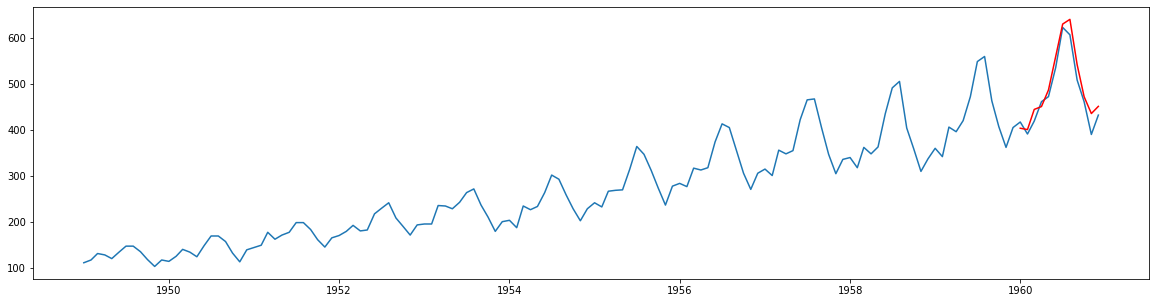

In [13]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index,df_test['#PriceOfWatch$'])
plt.plot(df_test.index,df_test['Predictions'],color='r')
plt.show()

#### Next year prediction


In [14]:
train = df
scaler.fit(train)
train = scaler.transform(train)
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model.fit_generator(generator,epochs=180)

pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

Epoch 1/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0017
Epoch 2/180
22/22 [==============================] - 1s 26ms/step - loss: 0.0015
Epoch 3/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0016
Epoch 4/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0016
Epoch 5/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0020
Epoch 6/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0015
Epoch 7/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0015
Epoch 8/180
22/22 [==============================] - 1s 27ms/step - loss: 0.0014
Epoch 9/180
22/22 [==============================] - 1s 27ms/step - loss: 0.0019
Epoch 10/180
22/22 [==============================] - 1s 27ms/step - loss: 0.0018
Epoch 11/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0016
Epoch 12/180
22/22 [==============================] - 1s 27ms/step - loss: 0.0014
Epoch 13/180
22/22 [=====

22/22 [==============================] - 1s 28ms/step - loss: 0.0021
Epoch 101/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0017
Epoch 102/180
22/22 [==============================] - 1s 35ms/step - loss: 0.0022
Epoch 103/180
22/22 [==============================] - 1s 32ms/step - loss: 0.0026
Epoch 104/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0033
Epoch 105/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0027
Epoch 106/180
22/22 [==============================] - 1s 26ms/step - loss: 0.0020
Epoch 107/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0013
Epoch 108/180
22/22 [==============================] - 1s 27ms/step - loss: 0.0017
Epoch 109/180
22/22 [==============================] - 1s 27ms/step - loss: 9.7891e-04
Epoch 110/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0016
Epoch 111/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0016
Epoch 112/180


In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [16]:
future_dates.tail(12)

#PriceOfWatch$
1961-01-01            NaN
1961-02-01            NaN
1961-03-01            NaN
1961-04-01            NaN
1961-05-01            NaN
1961-06-01            NaN
1961-07-01            NaN
1961-08-01            NaN
1961-09-01            NaN
1961-10-01            NaN
1961-11-01            NaN
1961-12-01            NaN

In [17]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=future_dates[-n_input:].index,columns=['Predictions'])

df_proj = pd.concat([df,df_predict],axis=1)

In [18]:
df_proj.tail(12)

#PriceOfWatch$  Predictions
1961-01-01             NaN   477.923537
1961-02-01             NaN   470.364206
1961-03-01             NaN   502.210160
1961-04-01             NaN   550.635913
1961-05-01             NaN   587.581679
1961-06-01             NaN   674.943692
1961-07-01             NaN   765.307207
1961-08-01             NaN   756.378159
1961-09-01             NaN   637.911167
1961-10-01             NaN   557.811990
1961-11-01             NaN   491.749732
1961-12-01             NaN   523.660122

No handles with labels found to put in legend.


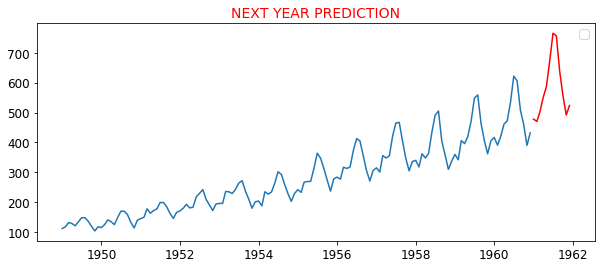

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index,df_proj['#PriceOfWatch$'])
plt.plot(df_proj.index,df_proj['Predictions'],color='r')
plt.legend(loc='best',fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("NEXT YEAR PREDICTION",fontsize=14,color='r')
plt.show()